# Summer 2024 Paris Olympics Exploration

[Data](https://www.kaggle.com/datasets/muhammadehsan02/olympic-summer-games-paris-2024?resource=download)

### Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
athletes_df = pd.read_csv("~/MEDS/EDS-217/eds217-project/raw_data/athletes.csv")
medals_total_df = pd.read_csv("~/MEDS/EDS-217/eds217-project/raw_data/medals_total.csv")

In [3]:
medals_total_df.info

<bound method DataFrame.info of    country_code        country                country_long  Gold Medal  \
0           USA  United States    United States of America          40   
1           CHN          China  People's Republic of China          40   
2           JPN          Japan                       Japan          20   
3           AUS      Australia                   Australia          18   
4           FRA         France                      France          16   
..          ...            ...                         ...         ...   
87          PER           Peru                        Peru           0   
88          QAT          Qatar                       Qatar           0   
89          SGP      Singapore                   Singapore           0   
90          SVK       Slovakia                    Slovakia           0   
91          ZAM         Zambia                      Zambia           0   

    Silver Medal  Bronze Medal  Total  
0             44            42    126  

## Cleaning birthdays and filter

In [38]:
athletes_df['birth_date'] = pd.to_datetime(athletes_df['birth_date'], format= "%Y-%m-%d")
athletes_df['disciplines'] = athletes_df['disciplines'].astype('string')

In [51]:
# Fixing formatting
athletes_df['disciplines'] = athletes_df['disciplines'].str.replace("['", " ")
athletes_df['disciplines'] = athletes_df['disciplines'].str.replace("']", " ")
athletes_df['disciplines'] = athletes_df['disciplines'].str.strip()

In [59]:
# Selecting columns
ath_select = athletes_df[['name', 'gender', 'country', 'events', 'birth_date', 'nickname', 'hobbies', 'occupation', 'philosophy', 'disciplines']].copy()
ath_select

,name,gender,country,events,birth_date,nickname,hobbies,occupation,philosophy,disciplines
0,ALEKSANYAN Artur,Male,Armenia,"[""Men's Greco-Roman 97kg""]",1991-10-21,White Bear,Playing and watching football,Athlete,"""Wrestling is my life."" (mediamax.am. 18 May 2...",Wrestling
1,AMOYAN Malkhas,Male,Armenia,"[""Men's Greco-Roman 77kg""]",1999-01-22,NaN,NaN,NaN,"""To become a good athlete, you first have to b...",Wrestling
2,GALSTYAN Slavik,Male,Armenia,"[""Men's Greco-Roman 67kg""]",1996-12-21,NaN,NaN,NaN,NaN,Wrestling
3,HARUTYUNYAN Arsen,Male,Armenia,"[""Men's Freestyle 57kg""]",1999-11-22,NaN,NaN,Athlete,"“Nothing is impossible, set goals in front of ...",Wrestling
4,TEVANYAN Vazgen,Male,Armenia,"[""Men's Freestyle 65kg""]",1999-10-27,NaN,NaN,Athlete,NaN,Wrestling
...,...,...,...,...,...,...,...,...,...,...
11105,JOSEPH Elijah,Male,Trinidad and Tobago,"[""Men's 4 x 400m Relay""]",2001-07-03,NaN,NaN,Athlete,NaN,Athletics
11106,HOMAN Khrystyna,Female,Ukraine,['Women +78 kg'],1999-01-31,Danger,"Playing the guitar, eating delicious food, pla...",Athlete,NaN,Judo
11107,CHELANGAT Annet Chemengich,Female,Uganda,"[""Women's 10,000m""]",1993-07-29,NaN,NaN,Athlete,NaN,Athletics
11108,ADA ETO Sefora,Female,Equatorial Guinea,"[""Women's 100m""]",2003-06-11,NaN,NaN,NaN,NaN,Athletics


In [60]:
# Filtering by sport
ath_select = ath_select[ath_select['disciplines'].isin(['Diving', 'Sailing', 'Swimming', 'Surfing', 'Water Polo', 'Shooting', 'Archcery', 'Badminton', 'Trampoline Gymnastics', 'Artistic Gymnastics', 'Sport Climbing', 'Judo', 'Weightlifting', 'Wrestling', 'Cycling Mountain Bike', 'Basketball', 'Volleyball', 'Rugby Sevens', 'Football', 'Fencing'])]

In [61]:
ath_select['disciplines']
np.unique(ath_select['disciplines'])

array(['Artistic Gymnastics', 'Badminton', 'Basketball',
       'Cycling Mountain Bike', 'Diving', 'Fencing', 'Football', 'Judo',
       'Rugby Sevens', 'Sailing', 'Shooting', 'Sport Climbing', 'Surfing',
       'Swimming', 'Trampoline Gymnastics', 'Volleyball', 'Water Polo',
       'Weightlifting', 'Wrestling'], dtype=object)

## Finding Olympic athlete's Star Sign


In [27]:
# Creating the Day of Year Column
ath_select['day_of_year'] = ath_select['birth_date'].apply(lambda x: x.timetuple().tm_yday)
ath_select.dtypes

name                   object
gender                 object
country                object
events                 object
birth_date     datetime64[ns]
nickname               object
hobbies                object
occupation             object
philosophy             object
disciplines            object
day_of_year             int64
dtype: object

In [28]:
def get_sign(df):
    if ((df >= 20) & (df <=49)):
        return 'Aquarius'
    elif ((df >= 50) & (df <=80)):
        return 'Pisces'
    elif ((df >= 81) & (df <=110)):
        return 'Aries'
    elif ((df >= 111) & (df <=140)):
        return 'Taurus'
    elif ((df >= 141) & (df <=172)):
        return 'Gemini'
    elif ((df >= 173) & (df <=204)):
        return 'Cancer'
    elif ((df >= 205) & (df <=234)):
        return 'Leo'
    elif ((df >= 235) & (df <=265)):
        return 'Virgo'
    elif ((df >= 266) & (df <=295)):
        return 'Libra'
    elif ((df >= 296) & (df <=325)):
        return 'Scorpio'
    elif ((df >= 326) & (df <=356)):
        return 'Sagittarius'
    elif ((df >= 357) | (df <= 19)):
        return 'Capricorn'

In [29]:
ath_select['sign'] = ath_select['day_of_year'].apply(get_sign)
ath_select.head()

,name,gender,country,events,birth_date,nickname,hobbies,occupation,philosophy,disciplines,day_of_year,sign
0,ALEKSANYAN Artur,Male,Armenia,"[""Men's Greco-Roman 97kg""]",1991-10-21,White Bear,Playing and watching football,Athlete,"""Wrestling is my life."" (mediamax.am. 18 May 2...",['Wrestling'],294,Libra
1,AMOYAN Malkhas,Male,Armenia,"[""Men's Greco-Roman 77kg""]",1999-01-22,NaN,NaN,NaN,"""To become a good athlete, you first have to b...",['Wrestling'],22,Aquarius
2,GALSTYAN Slavik,Male,Armenia,"[""Men's Greco-Roman 67kg""]",1996-12-21,NaN,NaN,NaN,NaN,['Wrestling'],356,Sagittarius
3,HARUTYUNYAN Arsen,Male,Armenia,"[""Men's Freestyle 57kg""]",1999-11-22,NaN,NaN,Athlete,"“Nothing is impossible, set goals in front of ...",['Wrestling'],326,Sagittarius
4,TEVANYAN Vazgen,Male,Armenia,"[""Men's Freestyle 65kg""]",1999-10-27,NaN,NaN,Athlete,NaN,['Wrestling'],300,Scorpio


## Turning Horoscope into Sign type

In [30]:
def find_element(df):
    if ((df == 'Aries') | (df == 'Leo') | (df == 'Sagittarius')):
        return("Fire")
        
    elif ((df == 'Taurus') | (df == 'Virgo') | (df == 'Capricorn')):
        return("Earth")
        
    elif ((df == 'Gemini') | (df == 'Libra') | (df == 'Aquarius')):
        return("Air")
        
    elif ((df == 'Cancer') | (df == 'Scorpio') | (df == 'Pisces')):
        return("Water")

In [31]:
ath_select['element'] = ath_select['sign'].apply(find_element)
ath_select.head()

,name,gender,country,events,birth_date,nickname,hobbies,occupation,philosophy,disciplines,day_of_year,sign,element
0,ALEKSANYAN Artur,Male,Armenia,"[""Men's Greco-Roman 97kg""]",1991-10-21,White Bear,Playing and watching football,Athlete,"""Wrestling is my life."" (mediamax.am. 18 May 2...",['Wrestling'],294,Libra,Air
1,AMOYAN Malkhas,Male,Armenia,"[""Men's Greco-Roman 77kg""]",1999-01-22,NaN,NaN,NaN,"""To become a good athlete, you first have to b...",['Wrestling'],22,Aquarius,Air
2,GALSTYAN Slavik,Male,Armenia,"[""Men's Greco-Roman 67kg""]",1996-12-21,NaN,NaN,NaN,NaN,['Wrestling'],356,Sagittarius,Fire
3,HARUTYUNYAN Arsen,Male,Armenia,"[""Men's Freestyle 57kg""]",1999-11-22,NaN,NaN,Athlete,"“Nothing is impossible, set goals in front of ...",['Wrestling'],326,Sagittarius,Fire
4,TEVANYAN Vazgen,Male,Armenia,"[""Men's Freestyle 65kg""]",1999-10-27,NaN,NaN,Athlete,NaN,['Wrestling'],300,Scorpio,Water


## Turning chosen sports into horoscope elements

In [34]:
ath_select['disciplines'] = ath_select['disciplines'].astype('string')
print(ath_select['disciplines'])



0        ['Wrestling']
1        ['Wrestling']
2        ['Wrestling']
3        ['Wrestling']
4        ['Wrestling']
             ...      
11105    ['Athletics']
11106         ['Judo']
11107    ['Athletics']
11108    ['Athletics']
11109    ['Wrestling']
Name: disciplines, Length: 11110, dtype: string


## Plotting horoscopes

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Libra'),
  Text(1, 0, 'Aquarius'),
  Text(2, 0, 'Sagittarius'),
  Text(3, 0, 'Scorpio'),
  Text(4, 0, 'Virgo'),
  Text(5, 0, 'Cancer'),
  Text(6, 0, 'Taurus'),
  Text(7, 0, 'Pisces'),
  Text(8, 0, 'Capricorn'),
  Text(9, 0, 'Leo'),
  Text(10, 0, 'Gemini'),
  Text(11, 0, 'Aries')])

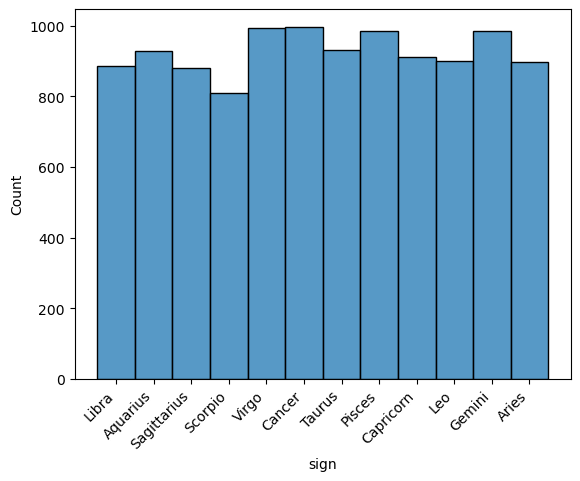

In [11]:
plt.figure()
sns.histplot(data=ath_select['sign'])
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3],
 [Text(0, 0, 'Air'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Earth')])

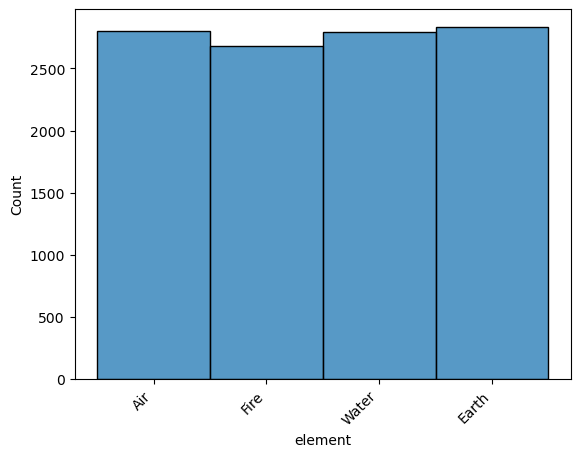

In [22]:
plt.figure()
sns.histplot(data=ath_select['element'])
plt.xticks(rotation=45, ha='right')